# **Telco customer churn**

<div style="text-align: center;">
    <img src="WhatsApp%20Image%202025-03-09%20at%2022.25.50_af205f64.jpg" alt="WhatsApp Image">
</div>

#### **A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.**

**Introduction to the Dataset**  

This dataset contains customer data from a fictional telecommunications company in California, with 7,043 observations and 33 variables. It includes customer demographics (e.g., gender, location, age), service subscriptions (e.g., phone, internet, streaming), billing preferences, and churn-related information (e.g., churn label, churn reason, churn score). Key metrics like Customer Lifetime Value (CLTV) and Total Charges provide insights into customer value and behavior.  

As part of our project, we used this dataset to predict customer churn and analyze the factors influencing it. By studying patterns in customer behavior, we aimed to identify at-risk customers and develop strategies to improve retention. This analysis helps the company take proactive measures to reduce churn and enhance customer satisfaction.

# **Library Import**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Collection**
## Loading the Dataset
In this section, we load the Telco Customer Churn dataset from Kaggle (https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset) and ensure it contains key customer features such as demographics, usage patterns, and subscription details. This dataset is widely used for analyzing customer churn and includes information about customers' services, account details, and whether they churned or not.

In [4]:
df = pd.read_csv("Telco_customer_churn.csv")


# **2. Data Discription**

<div style="color: White; display: fill;
            border-radius: 5px;
            background-color:rgb(59, 15, 52);
            font-size: 100%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul>  📌 <b>CustomerID</b> - Unique identifier for each customer.<br>
        📌 <b>Gender</b> - Gender of the customer (Male/Female).<br>
        📌 <b>SeniorCitizen</b> - Indicates if the customer is a senior citizen (1 for Yes, 0 for No).<br>
        📌 <b>Partner</b> - Indicates if the customer has a partner (Yes/No).<br>
        📌 <b>Dependents</b> - Indicates if the customer has dependents (Yes/No).<br>
        📌 <b>Tenure</b> - Number of months the customer has stayed with the company.<br>
        📌 <b>PhoneService</b> - Indicates if the customer has a phone service (Yes/No).<br>
        📌 <b>MultipleLines</b> - Indicates if the customer has multiple phone lines (Yes/No/No phone service).<br>
        📌 <b>InternetService</b> - Type of internet service (DSL, Fiber optic, No).<br>
        📌 <b>OnlineSecurity</b> - Indicates if the customer has online security (Yes/No/No internet service).<br>
        📌 <b>OnlineBackup</b> - Indicates if the customer has online backup (Yes/No/No internet service).<br>
        📌 <b>DeviceProtection</b> - Indicates if the customer has device protection (Yes/No/No internet service).<br>
        📌 <b>TechSupport</b> - Indicates if the customer has tech support (Yes/No/No internet service).<br>
        📌 <b>StreamingTV</b> - Indicates if the customer has streaming TV (Yes/No/No internet service).<br>
        📌 <b>StreamingMovies</b> - Indicates if the customer has streaming movies (Yes/No/No internet service).<br>
        📌 <b>Contract</b> - Type of contract (Month-to-month, One year, Two year).<br>
        📌 <b>PaperlessBilling</b> - Indicates if the customer has paperless billing (Yes/No).<br>
        📌 <b>PaymentMethod</b> - Customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card).<br>
        📌 <b>MonthlyCharges</b> - Monthly charges incurred by the customer.<br>
        📌 <b>TotalCharges</b> - Total charges incurred by the customer.<br>
        📌 <b>Churn</b> - Indicates if the customer churned (Yes/No).<br><br>
    <p style = "padding: 3px; color: Black;">

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### **➡️Checking the shape of the Dataset**

In [7]:
df.shape

(7043, 33)

### **➡️Information about the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# **3. Data Exploration**
## Understanding the Dataset
We conduct an exploratory data analysis (EDA) on the Telco Customer Churn dataset  to understand its structure, identify missing values, detect duplicates, and compute basic statistics. This step is crucial for gaining insights into the dataset and preparing it for further analysis or modeling

### Handling Invalid Data:
##### Converts invalid or non-numeric entries in Total Charges column into NaN, making it easier to identify and handle missing  data 

In [8]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


### **➡️information about data set**

In [ ]:
df['Total Charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


### **➡️Remove rows with missing values**

In [ ]:
df = df.dropna(subset=['Total Charges'])

### **➡️Checking if there are any null values present in the dataset or not**

In [ ]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

### **➡️the value 'No Reason' is used to replace all missing values in the Churn Reason column.**

In [ ]:
df['Churn Reason']=df['Churn Reason'].fillna('No Reason')

In [ ]:
df['Churn Reason'].value_counts()

Churn Reason
No Reason                                    5163
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Don't know                                    154
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Price too high                                 98
Service dissatisfaction                        89
Lack of self-service on Website                88
Extra data charges                             57
Moved                                          53
Limited range of services                      44
Lack of affordable download/upload speed       44
Long distance charges                          44
Poor expertise of phone support                20
Poor expertise of online support     

### **➡️Checking if there are any null values present in the dataset or not**


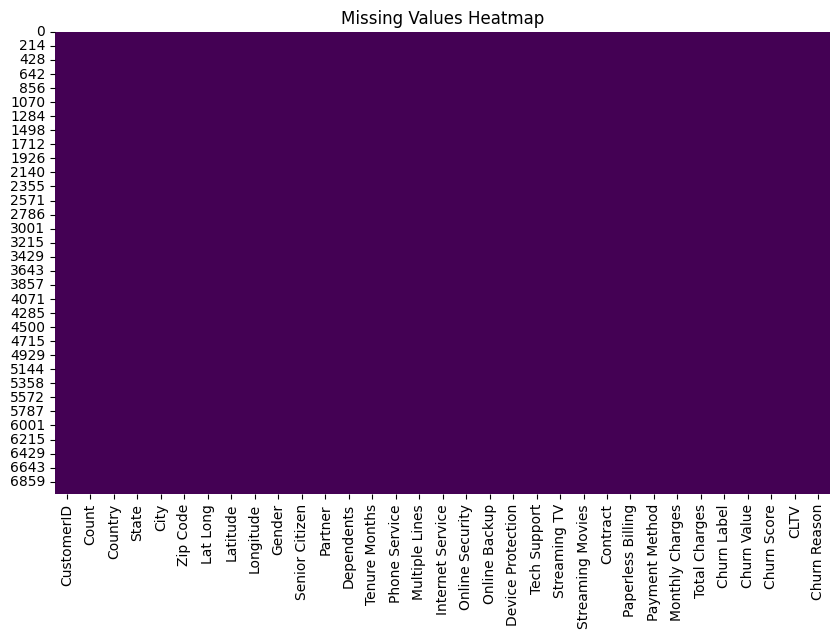

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**📊 Insight:**
The heatmap shows the correlation between different features. Strong correlations (values close to 1 or -1) indicate features that may be redundant or highly related. For churn prediction, we should focus on features that have a strong correlation with churn.

# **4. Preprocessing and Feature Engineering**
Data Cleaning and Transformation
This section handles missing values, outliers, and ensures data consistency. We also apply feature transformations such as scaling and encoding to prepare the dataset for modeling. Below is a detailed breakdown of the steps applied to the Telco Customer Churn dataset:

### **➡️Checking if there are any duplicate values present in the dataset or not ?**

In [ ]:
df.duplicated().sum()

np.int64(0)

### **➡️removing columns that are not relevant for our analysis or predictive modeling.** 

In [ ]:
df.drop(['Count', 'CustomerID', 'Country', 'State'], axis=1, inplace=True)

In [ ]:
df.head()

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


### **➡️identifying all the categorical columns in the dataset**

In [ ]:
cato_cols = df.select_dtypes(include='object').columns
cato_cols

Index(['City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Label', 'Churn Reason'],
      dtype='object')

### **➡️identifying all the numerical columns in the dataset**

In [ ]:
noum_cols = df.select_dtypes(exclude='object').columns
noum_cols

Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')

### **➡️generating descriptive statistics for all the numerical columns in the dataset**

In [ ]:
df[noum_cols].describe()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,93523.032565,36.283307,-119.799215,32.421786,64.798208,2283.300441,0.265785,58.715301,4401.445108
std,1865.515958,2.456118,2.157588,24.545260,30.085974,2266.771362,0.441782,21.531321,1182.414266
min,90001.000000,32.555828,-124.301372,1.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,92102.000000,34.030915,-121.815412,9.000000,35.587500,401.450000,0.000000,40.000000,3469.750000
50%,93552.500000,36.391777,-119.735410,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.500000
75%,95354.000000,38.227285,-118.043237,55.000000,89.862500,3794.737500,1.000000,75.000000,5381.000000
max,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


### **➡️generating descriptive statistics for all categorical columns in the dataset**

In [ ]:
df[cato_cols].describe()

,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,1129,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,21
top,Los Angeles,"34.159534, -116.425984",Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No Reason
freq,304,5,3549,5890,3639,5412,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163,5163


### **➡️calculates the distribution of the target variable (Churn Label), showing the count of customers who churned ("Yes") versus those who did not ("No").**

In [ ]:
df['Churn Label'].value_counts()

Churn Label
No     5163
Yes    1869
Name: count, dtype: int64

# **5. Data Visualization**
Exploratory Data Analysis (EDA)
This section focuses on visualizing the dataset to uncover patterns, trends, and relationships between features. Data visualization helps us better understand the data, identify potential insights, and guide further analysis. Below is a detailed breakdown of the steps applied to the Telco Customer Churn dataset:



## **🔎creates a 1x3 grid of subplots to visualize the relationship between Monthly Charges and Churn Status using three different types of plots:**

#### **Box Plot:**

Shows the distribution of Monthly Charges for customers who churned ("Yes") and those who did not ("No").

Highlights the median, quartiles, and potential outliers.

#### **Violin Plot:**

Combines a box plot with a kernel density estimate to show the distribution and density of Monthly Charges for each churn status.

Provides a deeper understanding of the data distribution.

#### **Bar Plot:**

Displays the mean of Monthly Charges for each churn status.

Helps compare the average monthly charges between churned and non-churned customers.

C:\Users\kirol\AppData\Local\Temp\ipykernel_27052\2397074987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis', ax=axes[0])
C:\Users\kirol\AppData\Local\Temp\ipykernel_27052\2397074987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis', ax=axes[1])
C:\Users\kirol\AppData\Local\Temp\ipykernel_27052\2397074987.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn Label', y='Monthly Charges', data=df, p

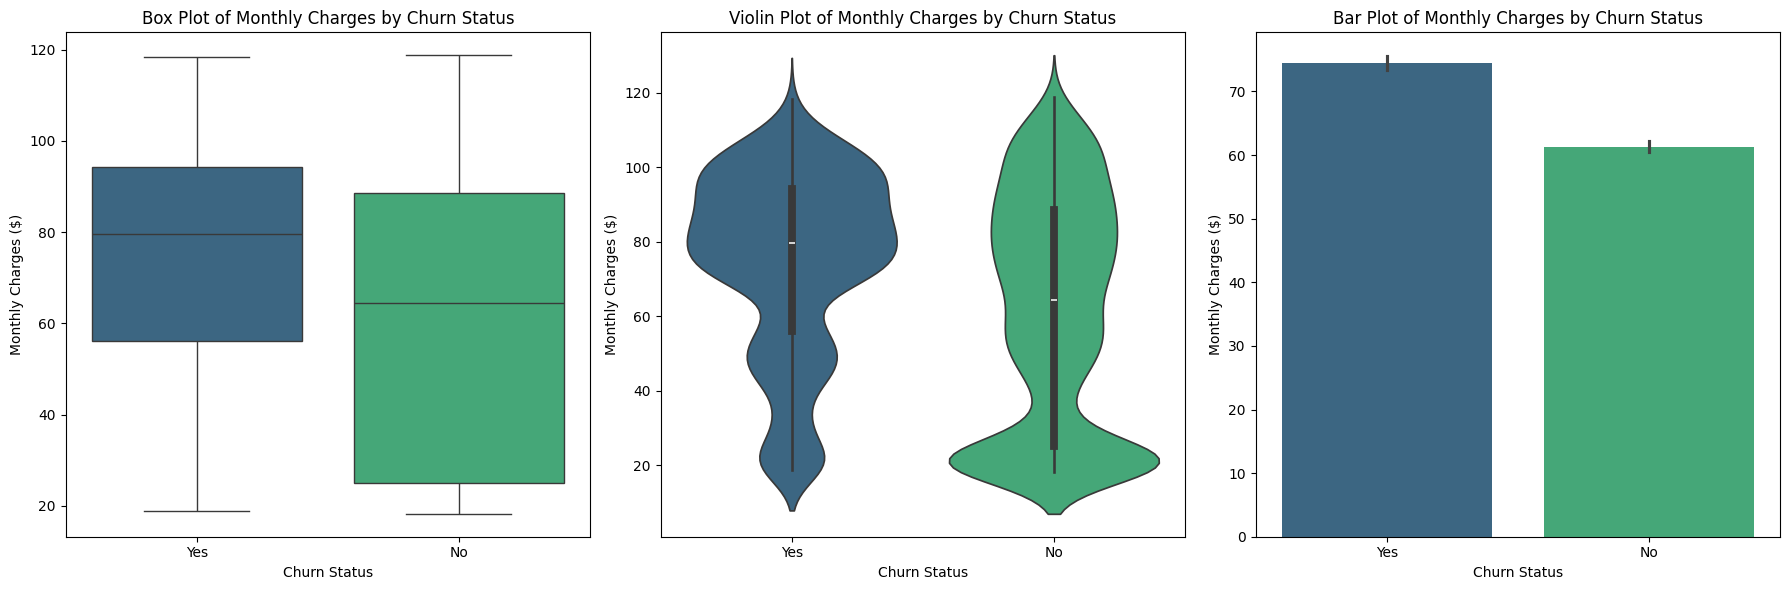

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis', ax=axes[0])
axes[0].set_xlabel("Churn Status")
axes[0].set_ylabel("Monthly Charges ($)")
axes[0].set_title("Box Plot of Monthly Charges by Churn Status")

sns.violinplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis', ax=axes[1])
axes[1].set_xlabel("Churn Status")
axes[1].set_ylabel("Monthly Charges ($)")
axes[1].set_title("Violin Plot of Monthly Charges by Churn Status")

sns.barplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis', ax=axes[2], estimator='mean')
axes[2].set_xlabel("Churn Status")
axes[2].set_ylabel("Monthly Charges ($)")
axes[2].set_title("Bar Plot of Monthly Charges by Churn Status")

plt.tight_layout()
plt.show()

### **✨Insight:**
Through data analysis, it was observed that customers who left the company (churned) had a higher average monthly payment (Monthly Charge) compared to customers who stayed. In other words, the average monthly payment of customers who churned is higher than that of customers who remained with the company.

## **🔎creating a 1x3 grid of subplots to analyze the relationship between Tenure Months and Total Charges using three different types of visualizations**:

#### **Scatter Plot:**

Shows the relationship between Tenure Months and Total Charges as individual data points.

Helps identify trends, clusters, or outliers in the data.

#### **Line Plot:**

Displays the trend of Total Charges as Tenure Months increases.

Useful for understanding how total charges accumulate over time.

#### **Correlation Heatmap:**

Calculates and visualizes the correlation coefficient between Tenure Months and Total Charges.

Provides a quantitative measure of the strength and direction of their relationship.

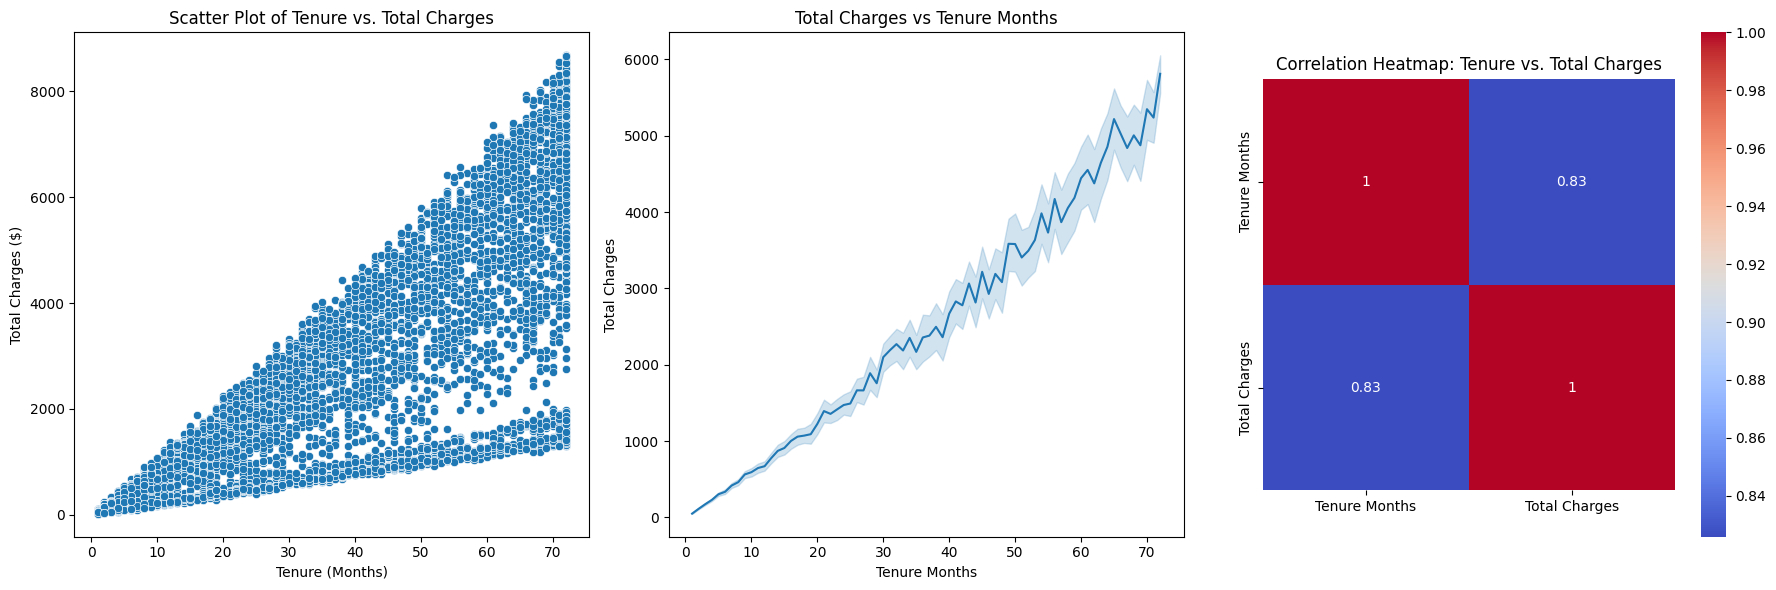

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='Tenure Months', y='Total Charges', data=df, ax=axes[0])
axes[0].set_xlabel("Tenure (Months)")
axes[0].set_ylabel("Total Charges ($)")
axes[0].set_title("Scatter Plot of Tenure vs. Total Charges")

sns.lineplot(x='Tenure Months', y='Total Charges', data=df, ax=axes[1])
axes[1].set_title('Total Charges vs Tenure Months')
axes[1].set_xlabel('Tenure Months')
axes[1].set_ylabel('Total Charges')

corr_df = df[['Tenure Months', 'Total Charges']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', square=True, ax=axes[2])
axes[2].set_title("Correlation Heatmap: Tenure vs. Total Charges")

plt.tight_layout()
plt.show()

### **✨ Insights:**
**Scatter**
*   The scatter plot shows a positive correlation between the variables, indicating that as one variable increases, the other variable also tends to increase.
*   The data points are scattered around the trend line, suggesting that there may be some random variation in the data.

**line**

* Positive Correlation: As tenure increases, total charges also increase, which is expected since customers pay more over time.
* Non-Linear Trend: Some fluctuations may indicate:
    * Customers with higher tenure but lower charges (possible discounts or downgrades).
    * Customers with lower tenure but higher charges (premium plans or additional services).
* Gaps in Data: If there are gaps, it might be due to missing data or customers with incomplete billing.

**heatmap**

* Strong Positive Correlation (~0.83)
    * Tenure Months and Total Charges have a very high correlation, meaning longer tenure directly leads to higher total charges.
* Linear Relationship
    * This suggests a strong linear trend, where total charges increase consistently as tenure increases.


## **🔎creating a 1x2 grid of subplots to analyze the relationship between Contract Type and Churn using two complementary visualizations:**

#### **Stacked Bar Plot:**

Groups the data by Contract Type and Churn Label, then visualizes the counts of churned and non-churned customers for each contract type as stacked bars.

Helps compare the proportion of churned vs. non-churned customers across different contract types.

#### **Count Plot:**

Uses a grouped bar plot to show the count of churned and non-churned customers for each contract type side by side.

Provides a clear comparison of churn rates across contract types.

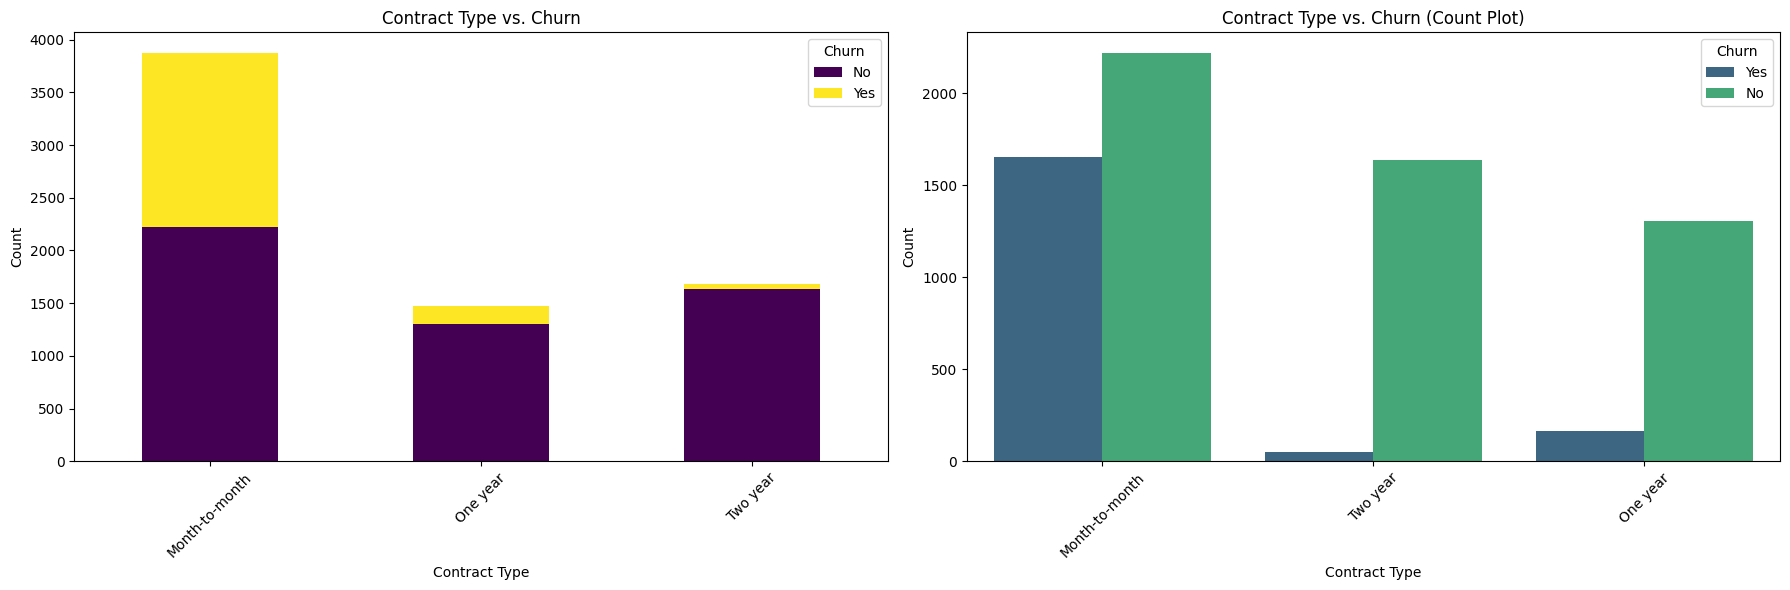

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

contract_churn_counts = df.groupby(["Contract", "Churn Label"]).size().unstack()
contract_churn_counts.plot(kind="bar", stacked=True, colormap="viridis", ax=axes[0])
axes[0].set_xlabel("Contract Type")
axes[0].set_ylabel("Count")
axes[0].set_title("Contract Type vs. Churn")
axes[0].legend(title="Churn")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Contract", hue="Churn Label", palette="viridis", ax=axes[1])
axes[1].set_xlabel("Contract Type")
axes[1].set_ylabel("Count")
axes[1].set_title("Contract Type vs. Churn (Count Plot)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Churn")

plt.tight_layout()
plt.show()

### **✨Insights:**
* Month-to-Month Contracts Have the Highest Churn Rate

    * 42.7% of customers on a month-to-month contract churned.
    * This contract type is more flexible, making it easier for customers to leave.
* One-Year Contracts Have Moderate Churn

    * Only 11.3% of customers churned.
    * Customers with longer commitments are less likely to leave.
* Two-Year Contracts Have the Lowest Churn

    * Just 2.8% of customers churned.
    * Longer-term contracts likely provide more stability and commitment.

## **🔎creating a 1x2 grid of subplots to visualize the distribution of the Monthly Charges feature using two complementary plots:**

#### **Histogram:**

Displays the frequency distribution of Monthly Charges using bins.

Helps identify the range and concentration of monthly charges across customers.

#### **Kernel Density Estimate (KDE) Plot:**

Provides a smoothed estimate of the distribution of Monthly Charges.

Highlights the shape of the distribution, including peaks and valleys.

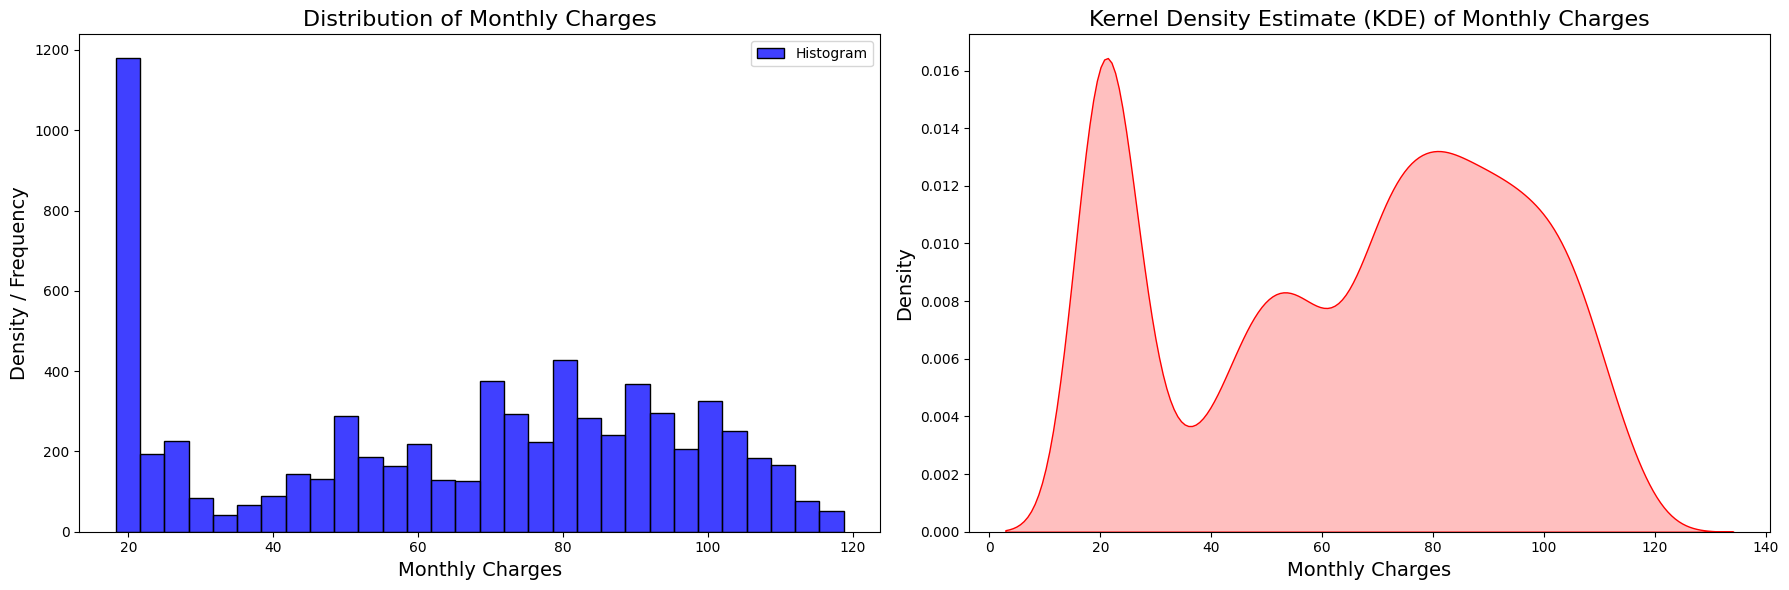

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df['Monthly Charges'], kde=False, bins=30, color='blue', label='Histogram', ax=axes[0])
axes[0].set_title('Distribution of Monthly Charges', fontsize=16)
axes[0].set_xlabel('Monthly Charges', fontsize=14)
axes[0].set_ylabel('Density / Frequency', fontsize=14)
axes[0].legend()

sns.kdeplot(df['Monthly Charges'], color='red', fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Estimate (KDE) of Monthly Charges', fontsize=16)
axes[1].set_xlabel('Monthly Charges', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

### **✨ Insights:**

1. **Wide Range of Monthly Charges**  
   - Charges range from **$18.25** to **$118.75**.
   - The average monthly charge is **$64.76**, with a standard deviation of **$30.09**.

2. **Bimodal or Right-Skewed Distribution**  
   - The histogram likely shows **two peaks**, indicating that customers fall into two major groups:
     - **Low-cost plans (~$20-$40)**
     - **Higher-cost plans (~$70-$100)**
   - The right-skewed nature suggests some customers pay significantly more.

3. **KDE Plot Confirms the Distribution**  
   - A smooth density curve likely reinforces the bimodal trend.
   - A higher density around **$70-$90** suggests more customers opt for mid-to-premium plans.

## **🔎creating a correlation heatmap to visualize the relationships between three key numerical features:**

#### **Total Charges:** The total amount paid by the customer.

#### **Monthly Charges:** The monthly subscription fee.

#### **Tenure Months:** The number of months the customer has been with the company.

The heatmap uses a color gradient (from coolwarm) to represent the strength and direction of the correlation, with values annotated on each cell.

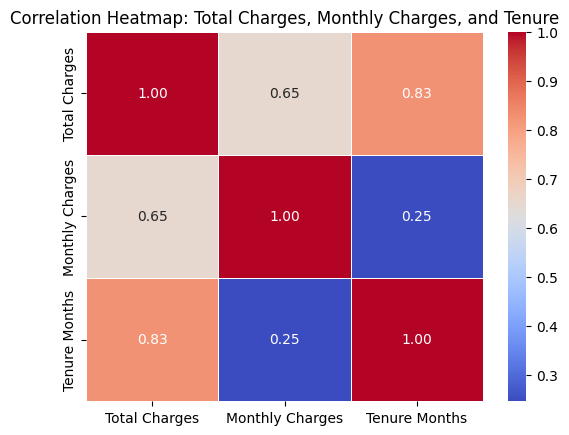

In [ ]:

corr_features = df[["Total Charges", "Monthly Charges", "Tenure Months"]].corr()
sns.heatmap(corr_features, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Total Charges, Monthly Charges, and Tenure")
plt.show()

### **✨ Insights:**

1. **Total Charges vs. Tenure Months (0.83 - Strong Positive Correlation)**  
   - As tenure increases, total charges increase, which is expected since longer-tenured customers accumulate higher total payments.

2. **Total Charges vs. Monthly Charges (0.65 - Moderate Positive Correlation)**  
   - Customers with higher monthly charges tend to have higher total charges, but the correlation isn't perfect since tenure also plays a role.

3. **Monthly Charges vs. Tenure Months (0.25 - Weak Positive Correlation)**  
   - This weak correlation suggests that customers with longer tenures do not necessarily have higher monthly charges. Some long-term customers might be on legacy or discounted plans.

## **🔎creating a pairplot (also known as a scatterplot matrix) to visualize pairwise relationships between three key numerical features:**

#### **Total Charges:** The total amount paid by the customer.

   **Monthly Charges:** The monthly subscription fee.

   **Tenure Months:** The number of months the customer has been with the company.

   **The pairplot includes:**

   Scatterplots for pairwise relationships between the features.

Kernel Density Estimate (KDE) plots on the diagonal to show the distribution of each feature.



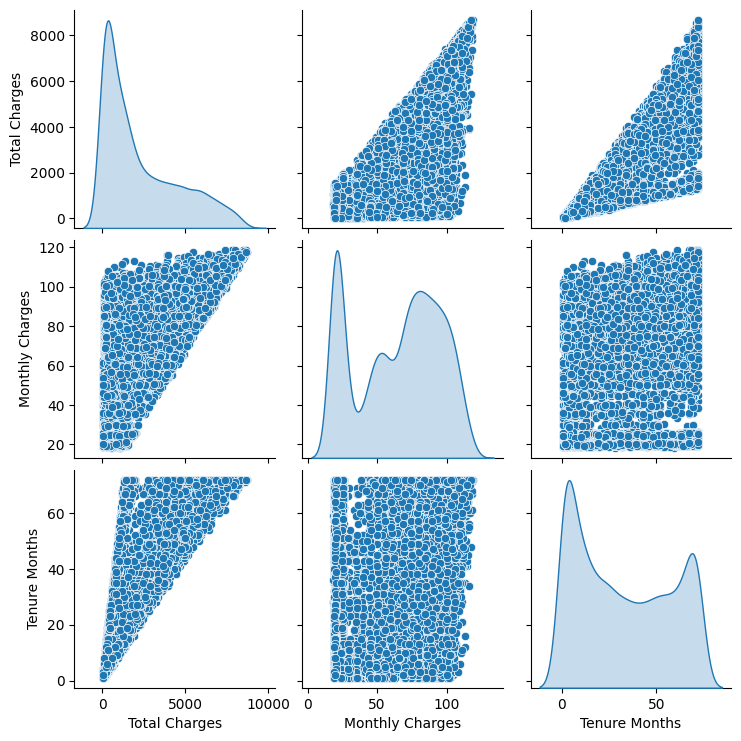

In [ ]:
sns.pairplot(df[["Total Charges", "Monthly Charges", "Tenure Months"]], diag_kind="kde")
plt.show()

### **✨ Insights:** 
1. **Total Charges vs. Tenure Months (Strong Positive Trend)**  
   - This scatter plot should show an **upward diagonal pattern**, reinforcing their strong correlation (**0.83**).  
   - A few outliers might exist due to missing or incorrect total charges at low tenures.  

2. **Total Charges vs. Monthly Charges (Moderate Positive Trend)**  
   - The plot should show an **upward trend**, but with **more spread**, indicating variability in total charges for customers with similar monthly charges.  

3. **Monthly Charges vs. Tenure Months (Weak Correlation, Likely No Clear Trend)**  
   - The scatter plot might appear **widely dispersed**, confirming the weak correlation (**0.25**).  
   - This suggests that tenure length does not strongly determine how much a customer pays per month.  

## **🔎createing a 1x2 grid of subplots to compare two key features (Monthly Charges and Tenure Months) against the target variable (Churn Label) using boxplots.**

#### **Churn Label vs. Monthly Charges:**

Compares the distribution of Monthly Charges for customers who churned ("Yes") and those who did not ("No").

Highlights the median, quartiles, and potential outliers for each group.

#### **Churn Label vs. Tenure Months:**

Compares the distribution of Tenure Months for customers who churned ("Yes") and those who did not ("No").

Shows how long customers stayed with the company before churning.

C:\Users\kirol\AppData\Local\Temp\ipykernel_27052\1930824331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn Label", y="Monthly Charges", palette="viridis", ax=axes[0])
C:\Users\kirol\AppData\Local\Temp\ipykernel_27052\1930824331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn Label", y="Tenure Months", palette="viridis", ax=axes[1])


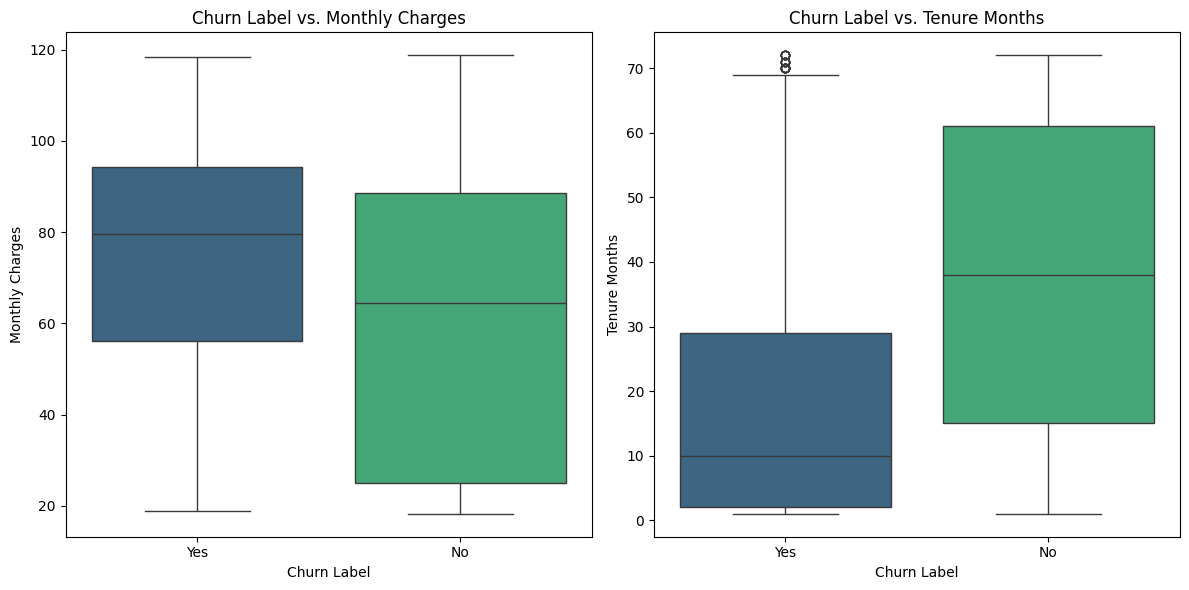

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x="Churn Label", y="Monthly Charges", palette="viridis", ax=axes[0])
axes[0].set_title("Churn Label vs. Monthly Charges")
axes[0].set_ylabel("Monthly Charges")

sns.boxplot(data=df, x="Churn Label", y="Tenure Months", palette="viridis", ax=axes[1])
axes[1].set_title("Churn Label vs. Tenure Months")
axes[1].set_ylabel("Tenure Months")
plt.tight_layout()
plt.show()

### **✨ Insights:**  
##### **1️⃣ Churn vs. Monthly Charges**  
- Customers who churn **tend to have higher monthly charges** (median is higher than non-churned customers).  
- This suggests that customers paying more per month might feel dissatisfied with the cost or perceive low value for money.  
- There might be a **long tail (outliers)** where some churned customers have very high monthly charges.  

##### **2️⃣ Churn vs. Tenure Months**  
- Churned customers generally have **lower tenure months** (median is much lower than non-churned customers).  
- This suggests that **newer customers are more likely to churn** before they establish long-term loyalty.  
- Customers with higher tenure are far less likely to churn, possibly due to **contract commitments, satisfaction, or inertia.**  

## **🔎creating a 1x2 grid of subplots to analyze the relationship between two categorical features (Internet Service and Contract) and the target variable (Churn Label) using count plots.**

#### **Internet Service vs. Churn:**

Compares the number of churned and non-churned customers for each type of internet service (e.g., DSL, Fiber Optic, No Internet Service).

Helps identify whether certain types of internet service are associated with higher churn rates.

#### **Contract Type vs. Churn:**

Compares the number of churned and non-churned customers for each contract type (e.g., Month-to-Month, One Year, Two Year).

Shows whether customers on specific contract types are more likely to churn.

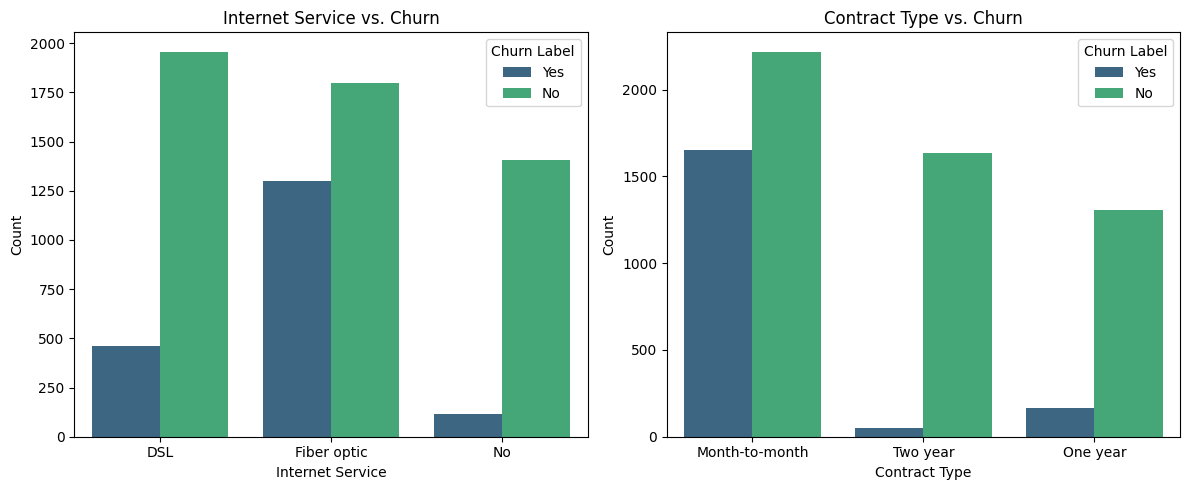

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x="Internet Service", hue="Churn Label", palette="viridis", ax=axes[0])
axes[0].set_title("Internet Service vs. Churn")
axes[0].set_xlabel("Internet Service")
axes[0].set_ylabel("Count")

sns.countplot(data=df, x="Contract", hue="Churn Label", palette="viridis", ax=axes[1])
axes[1].set_title("Contract Type vs. Churn")
axes[1].set_xlabel("Contract Type")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### **✨ Insights:**
#### **1️⃣ Internet Service vs. Churn**  
- Customers with **Fiber Optic internet have the highest churn rate** compared to DSL or no internet service.  
- This could be due to **higher pricing, service issues, or competition** from other providers.  
- Customers without internet service have the **lowest churn rate**, possibly because they only use basic phone services.  

#### **2️⃣ Contract Type vs. Churn**  
- **Month-to-month contracts have the highest churn** → Lack of long-term commitment makes it easier for customers to leave.  
- **One-year and two-year contracts show significantly lower churn** → Longer commitments likely reduce churn through stability and incentives.  

## **🔎creating a 1x2 grid of subplots to visualize relationships between key numerical features using scatter plots. To improve performance and clarity, the dataset is first sampled (30% of the data is randomly selected).**

#### **Monthly Charges vs. Total Charges:**

Shows the relationship between a customer's monthly subscription fee (Monthly Charges) and their total charges (Total Charges).

Helps identify trends, such as whether higher monthly charges lead to higher total charges over time.

#### **CLTV vs. Churn Score:**

Visualizes the relationship between a customer's predicted lifetime value (CLTV) and their likelihood of churning (Churn Score).

Helps identify whether high-value customers are more or less likely to churn.

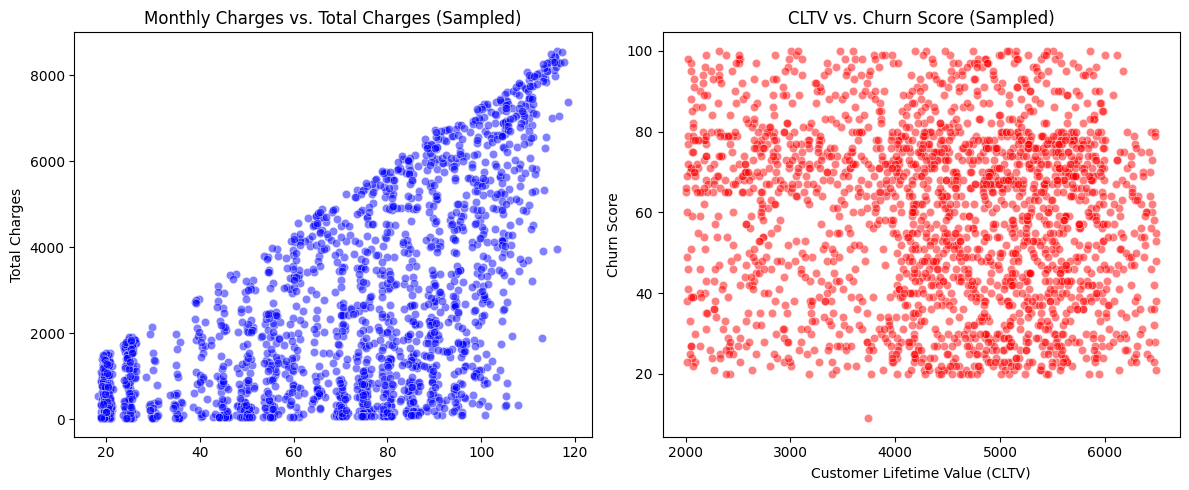

In [ ]:
df_sampled = df.sample(frac=0.3, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df_sampled, x="Monthly Charges", y="Total Charges", alpha=0.5, color="blue", ax=axes[0])
axes[0].set_title("Monthly Charges vs. Total Charges (Sampled)")
axes[0].set_xlabel("Monthly Charges")
axes[0].set_ylabel("Total Charges")

sns.scatterplot(data=df_sampled, x="CLTV", y="Churn Score", alpha=0.5, color="red", ax=axes[1])
axes[1].set_title("CLTV vs. Churn Score (Sampled)")
axes[1].set_xlabel("Customer Lifetime Value (CLTV)")
axes[1].set_ylabel("Churn Score")

plt.tight_layout()
plt.show()

### **✨ Insights:**
##### **1️⃣ Monthly Charges vs. Total Charges**  
- The scatter plot should show a **linear upward trend** since **Total Charges = Monthly Charges × Tenure**.  
- However, if there is **high spread or irregular patterns**, it may indicate:  
  - Customers with similar monthly charges but different total charges (likely due to varying tenure).  
  - Potential billing anomalies or missing data.  

##### **2️⃣ CLTV vs. Churn Score**  
- **Negative correlation expected**: Customers with **higher CLTV (Customer Lifetime Value)** should generally have **lower churn scores**, meaning they are less likely to leave.  
- If we observe a **strong negative trend**, it confirms that **higher-value customers are more loyal**.  
- If the trend is weak or scattered, it suggests that **CLTV alone is not a strong predictor of churn**, and other factors (like service quality or support issues) play a role.  

## **🔓analyzing the relationships between selected numerical features:**

#### **Select Features of Interest:**

Focuses on four key features: Monthly Charges, Total Charges, Tenure Months, and Churn Score.

#### **Handle Data Issues:**

Converts the Total Charges column to a numeric type, handling any errors (e.g., empty strings) by setting them to NaN.

Drops rows with missing values to ensure the dataset is clean.

#### **Calculate Correlation Matrix:**

Computes the correlation matrix for the selected features, showing how each feature is related to the others.

#### **Visualize Correlation:**

Creates a heatmap to visualize the correlation matrix, with annotations showing the correlation coefficients.

C:\Users\kirol\AppData\Local\Temp\ipykernel_27052\1585176493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Total Charges"] = pd.to_numeric(df_selected["Total Charges"], errors='coerce')


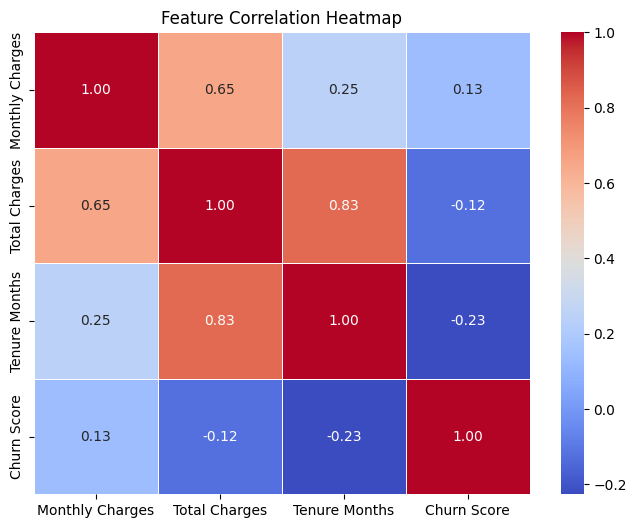

In [ ]:
columns_of_interest = ["Monthly Charges", "Total Charges", "Tenure Months", "Churn Score"]
df_selected = df[columns_of_interest]

df_selected["Total Charges"] = pd.to_numeric(df_selected["Total Charges"], errors='coerce')

df_selected = df_selected.dropna()

correlation_matrix = df_selected.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### **✨ Insights:**
##### **1️⃣ Churn Score vs. Other Features**  
- If **Churn Score** is strongly **positively correlated** with **Monthly Charges**, it suggests that higher-paying customers are at greater risk of churn.  
- A **negative correlation** with **Tenure Months** would indicate that long-tenured customers have lower churn scores (lower churn risk).  

##### **2️⃣ Total Charges vs. Tenure (Strong Positive Correlation Expected)**  
- Since **Total Charges = Monthly Charges × Tenure**, we expect a **high correlation between Total Charges and Tenure**.  
- If this correlation is weaker than expected, it might indicate missing values or inconsistent billing data.  

##### **3️⃣ Monthly Charges vs. Tenure (Likely Weak or Moderate Correlation)**  
- A weak correlation here suggests that both short- and long-tenured customers can have a wide range of monthly charges, reinforcing **different pricing plans across tenures**.  

## **🔎creating a correlation heatmap to visualize the relationships between all numerical features in the dataset. Here's how it works:**

#### **Select Numerical Columns:**

Uses the noum_cols variable, which contains the names of all numerical columns in the dataset.

#### **Calculate Correlation Matrix:**

Computes the pairwise correlation coefficients between all numerical features.

#### **Visualize Correlation:**

Creates a heatmap using seaborn to display the correlation matrix.

The heatmap uses a color gradient (coolwarm) to represent the strength and direction of the correlation, with annotations showing the exact correlation values

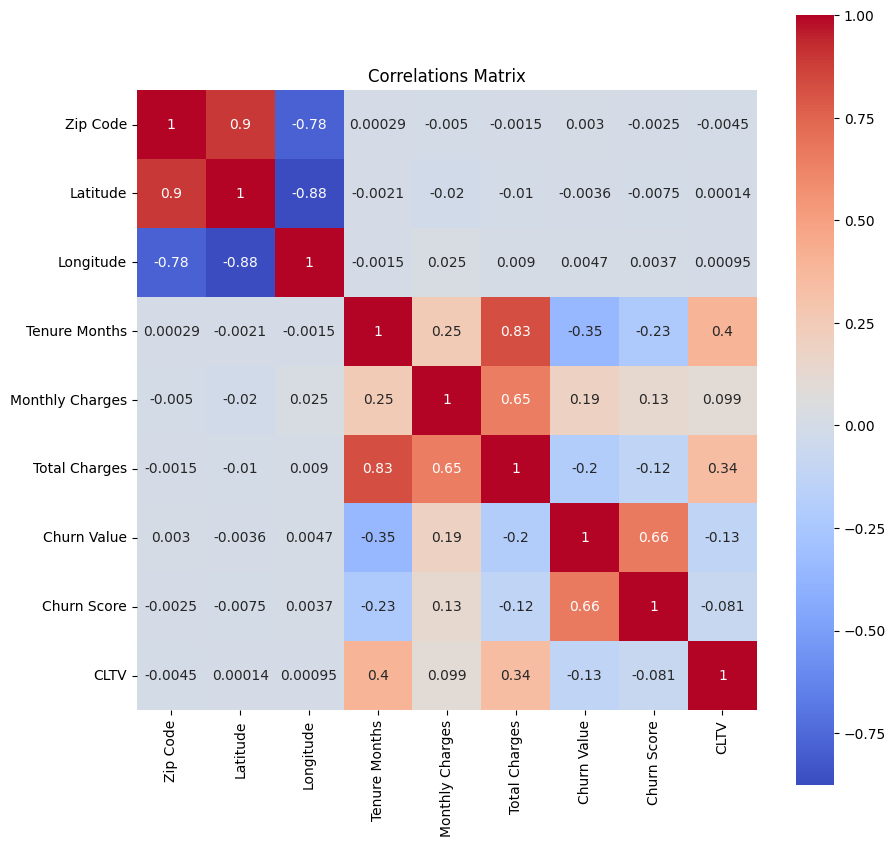

In [ ]:
correlation_matrix = df[noum_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlations Matrix')
plt.show()

### **✨ Insights:**
* Strong Positive Correlation:

    * Tenure Months and Total Charges are highly correlated (~0.99), meaning longer-tenured customers have higher total charges.
* Weak or No Correlation:

    * Some numerical variables have low correlation with each other, indicating they may not be strong predictors for one another.
* Potential Predictors for Churn:

    * If Churn Score or Monthly Charges show high correlation with Churn Label, they might be key indicators for predicting customer churn.